# **Automatidata project**
**Go Beyond the Numbers: Translate Data into Insights**

You are the newest data professional in a fictional data consulting firm: Automatidata. The team is still early into the project, having only just completed an initial plan of action and some early Python coding work. 

Luana Rodriquez, the senior data analyst at Automatidata, is pleased with the work you have already completed and requests your assistance with some EDA and data visualization work for the New York City Taxi and Limousine Commission project (New York City TLC) to get a general understanding of what taxi ridership looks like. The management team is asking for a Python notebook showing data structuring and cleaning, as well as any matplotlib/seaborn visualizations plotted to help understand the data. At the very least, include a box plot of the ride durations and some time series plots, like a breakdown by quarter or month. 

Additionally, the management team has recently asked all EDA to include Tableau visualizations. For this taxi data, create a Tableau dashboard showing a New York City map of taxi/limo trips by month. Make sure it is easy to understand to someone who isn’t data savvy, and remember that the assistant director at the New York City TLC is a person with visual impairments.


# **PACE stages** 


<img src="images/Pace.png" width="100" height="100" align=left>

   *        [Plan](#scrollTo=psz51YkZVwtN&line=3&uniqifier=1)
   *        [Analyze](#scrollTo=mA7Mz_SnI8km&line=4&uniqifier=1)
   *        [Construct](#scrollTo=Lca9c8XON8lc&line=2&uniqifier=1)
   *        [Execute](#scrollTo=401PgchTPr4E&line=2&uniqifier=1)


## PACE: Plan 




### Imports, links, and loading
 
Link to supporting materials: 
Tableau Public: https://public.tableau.com/s/ 

For EDA of the data, I'll import the data and packages that would be most helpful, such as pandas, numpy and matplotlib. 


In [2]:
# Importing packages and libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
import seaborn as sns 

In [3]:
# Loading dataset into dataframe
df = pd.read_csv('2017_Yellow_Taxi_Trip_Data.csv')

## PACE: Analyze 



In [4]:
df.head(10)

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,24870114,2,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56
1,35634249,1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80
2,106203690,1,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75
3,38942136,2,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69
4,30841670,2,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80
5,23345809,2,03/25/2017 8:34:11 PM,03/25/2017 8:42:11 PM,6,2.30,1,N,161,236,1,9.0,0.5,0.5,2.06,0.0,0.3,12.36
6,37660487,2,05/03/2017 7:04:09 PM,05/03/2017 8:03:47 PM,1,12.83,1,N,79,241,1,47.5,1.0,0.5,9.86,0.0,0.3,59.16
7,69059411,2,08/15/2017 5:41:06 PM,08/15/2017 6:03:05 PM,1,2.98,1,N,237,114,1,16.0,1.0,0.5,1.78,0.0,0.3,19.58
8,8433159,2,02/04/2017 4:17:07 PM,02/04/2017 4:29:14 PM,1,1.20,1,N,234,249,2,9.0,0.0,0.5,0.00,0.0,0.3,9.80
9,95294817,1,11/10/2017 3:20:29 PM,11/10/2017 3:40:55 PM,1,1.60,1,N,239,237,1,13.0,0.0,0.5,2.75,0.0,0.3,16.55


In [5]:
df.size

408582

In [6]:
df.describe()

,Unnamed: 0,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,2.269900e+04,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000
mean,5.675849e+07,1.556236,1.642319,2.913313,1.043394,162.412353,161.527997,1.336887,13.026629,0.333275,0.497445,1.835781,0.312542,0.299551,16.310502
std,3.274493e+07,0.496838,1.285231,3.653171,0.708391,66.633373,70.139691,0.496211,13.243791,0.463097,0.039465,2.800626,1.399212,0.015673,16.097295
min,1.212700e+04,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-120.000000,-1.000000,-0.500000,0.000000,0.000000,-0.300000,-120.300000
25%,2.852056e+07,1.000000,1.000000,0.990000,1.000000,114.000000,112.000000,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.750000
50%,5.673150e+07,2.000000,1.000000,1.610000,1.000000,162.000000,162.000000,1.000000,9.500000,0.000000,0.500000,1.350000,0.000000,0.300000,11.800000
75%,8.537452e+07,2.000000,2.000000,3.060000,1.000000,233.000000,233.000000,2.000000,14.500000,0.500000,0.500000,2.450000,0.000000,0.300000,17.800000
max,1.134863e+08,2.000000,6.000000,33.960000,99.000000,265.000000,265.000000,4.000000,999.990000,4.500000,0.500000,200.000000,19.100000,0.300000,1200.290000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             22699 non-null  int64  
 1   VendorID               22699 non-null  int64  
 2   tpep_pickup_datetime   22699 non-null  object 
 3   tpep_dropoff_datetime  22699 non-null  object 
 4   passenger_count        22699 non-null  int64  
 5   trip_distance          22699 non-null  float64
 6   RatecodeID             22699 non-null  int64  
 7   store_and_fwd_flag     22699 non-null  object 
 8   PULocationID           22699 non-null  int64  
 9   DOLocationID           22699 non-null  int64  
 10  payment_type           22699 non-null  int64  
 11  fare_amount            22699 non-null  float64
 12  extra                  22699 non-null  float64
 13  mta_tax                22699 non-null  float64
 14  tip_amount             22699 non-null  float64
 15  to

There is no missing data according to the results.



## PACE: Construct 


### Boxplots

I'll perform a check for outliers on relevant columns such as trip distance and trip duration. Some of the best ways to identify the presence of outliers in data are box plots and histograms. 
  

In [8]:
# Converting data columns to datetime
df['tpep_pickup_datetime']=pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime']=pd.to_datetime(df['tpep_dropoff_datetime'])

**trip distance**

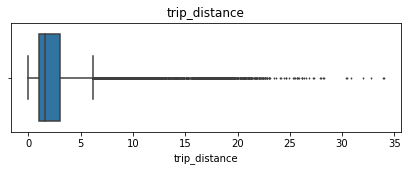

In [9]:
# Creating box plot of trip_distance
#==> ENTER YOUR CODE HERE
plt.figure(figsize=(7,2))
plt.title('trip_distance')
sns.boxplot(data=None, x=df['trip_distance'], fliersize=1);

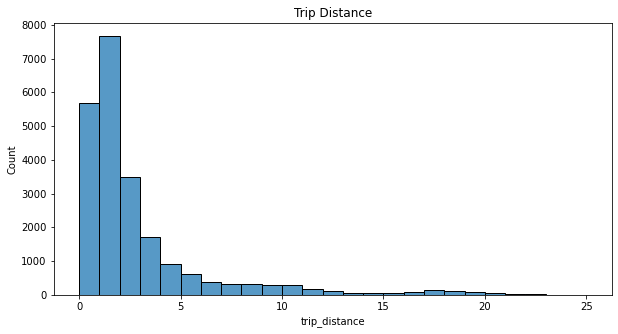

In [10]:
# Creating histogram of trip_distance
#==> ENTER YOUR CODE HERE
plt.figure(figsize=(10,5))
sns.histplot(df['trip_distance'], bins=range(0,26,1))
plt.title('Trip Distance');

Most trips consisted of distances shorter than two miles, and as the travel distance extended beyond this threshold, there was a sharp decline in the number of trips.

**total amount**

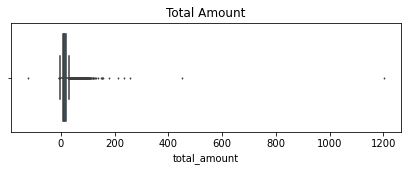

In [11]:
# Creating box plot of total_amount
#==> ENTER YOUR CODE HERE
plt.figure(figsize=(7,2))
plt.title('Total Amount')
sns.boxplot(x=df['total_amount'], fliersize=1);

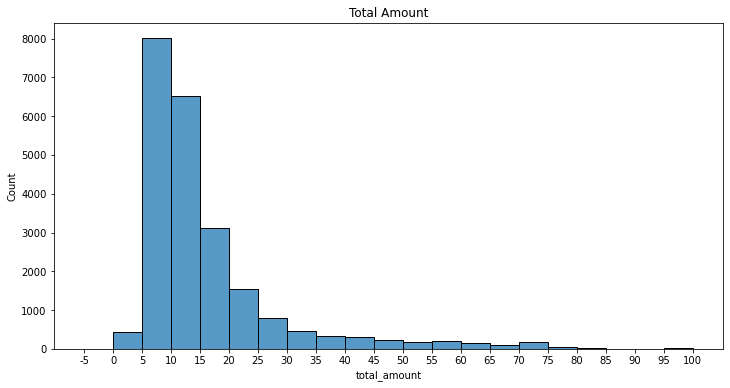

In [12]:
# Creating histogram of total_amount
#==> ENTER YOUR CODE HERE
plt.figure(figsize=(12,6))
plt.title('Total Amount')
ax= sns.histplot(df['total_amount'], bins=range(-5,101,5))
ax.set_xticks(range(-5,101,5))
ax.set_xticklabels(range(-5,101,5));

The overall expenses for each journey also exhibit a right-skewed distribution, with the majority of costs falling within the $5-15 range.

**tip amount**

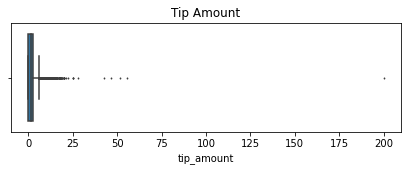

In [13]:
# Creating box plot of tip_amount
#==> ENTER YOUR CODE HERE
plt.figure(figsize=(7,2))
plt.title('Tip Amount')
sns.boxplot(x=df['tip_amount'], fliersize=1);

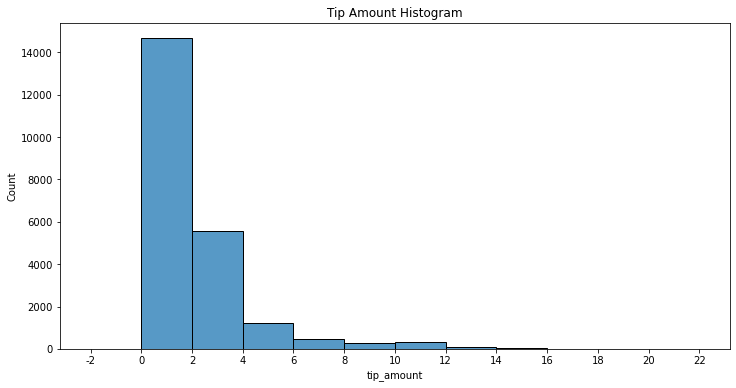

In [14]:
# Creating histogram of tip_amount
#==> ENTER YOUR CODE HERE
plt.figure(figsize=(12,6))
plt.title('Tip Amount Histogram')
ax= sns.histplot(df['tip_amount'], bins=range(-2,24,2))
ax.set_xticks(range(-2,24,2))
ax.set_xticklabels(range(-2,24,2));

The tip amount distribution exhibits a right-skew, with the vast majority of tips falling within the $0-3 range.

**tip_amount by vendor**

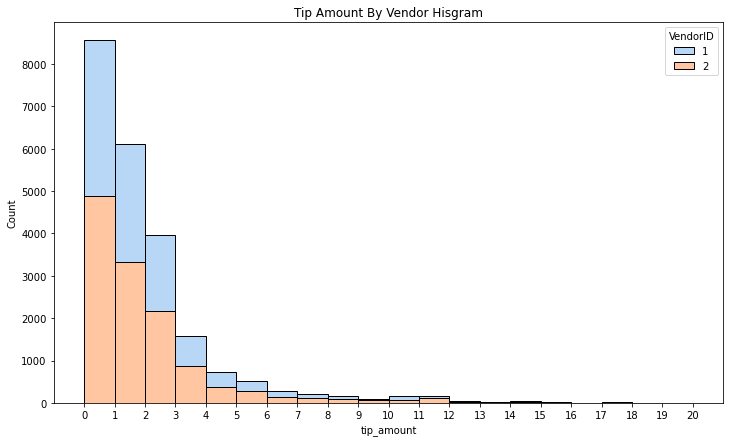

In [15]:
# Creating histogram of tip_amount by vendor
#==> ENTER YOUR CODE HERE
plt.figure(figsize=(12,7))
ax = sns.histplot(data=df, x='tip_amount', bins=range(0,21,1),
                  hue='VendorID',
                  multiple='stack',
                  palette='pastel')
ax.set_xticks(range(0,21,1))
ax.set_xticklabels(range(0,21,1))
plt.title('Tip Amount By Vendor Hisgram');

Breaking down the tip amount by vendor, I can see that there are no notable anomalies in how tips are spread across the two vendors in the dataset. Vendor two accounts for a slightly larger share of the rides, and this ratio remains relatively consistent across all tip amounts.

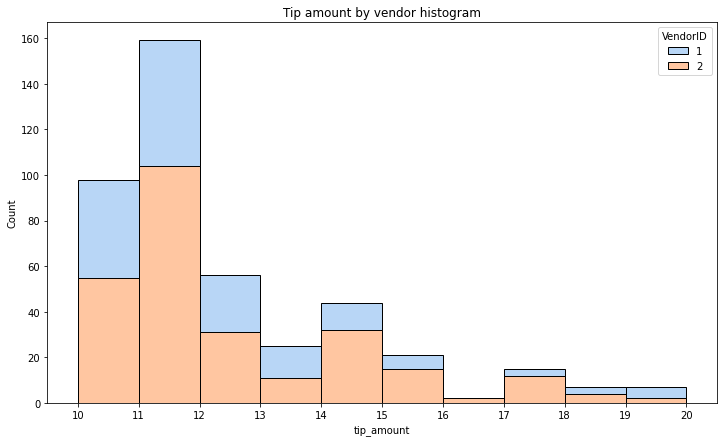

In [16]:
# Creating histogram of tip_amount by vendor for tips > $10 
#==> ENTER YOUR CODE HERE
tips_over_ten = df[df['tip_amount'] > 10]
plt.figure(figsize=(12,7))
ax = sns.histplot(data=tips_over_ten, x='tip_amount', bins=range(10,21,1), 
                  hue='VendorID', 
                  multiple='stack',
                  palette='pastel')
ax.set_xticks(range(10,21,1))
ax.set_xticklabels(range(10,21,1))
plt.title('Tip amount by vendor histogram');

The ratios remain consistent even for these larger tip amounts, except for the very highest range, which isn't significant due to the small number of samples in that category.

**Mean tips by passenger count**

Examining the unique values in the `passenger_count` column.

In [17]:
 df['passenger_count'].value_counts()

1    16117
2     3305
5     1143
3      953
6      693
4      455
0       33
Name: passenger_count, dtype: int64

In [18]:
# Calculating mean tips by passenger_count
mean_tips_by_passenger_count = df.groupby(['passenger_count']).mean()[['tip_amount']]
mean_tips_by_passenger_count


,tip_amount
passenger_count,
0,2.135758
1,1.848920
2,1.856378
3,1.716768
4,1.530264
5,1.873185
6,1.720260


Text(0.5, 1.0, 'Mean Tip Amount by Passenger Count')

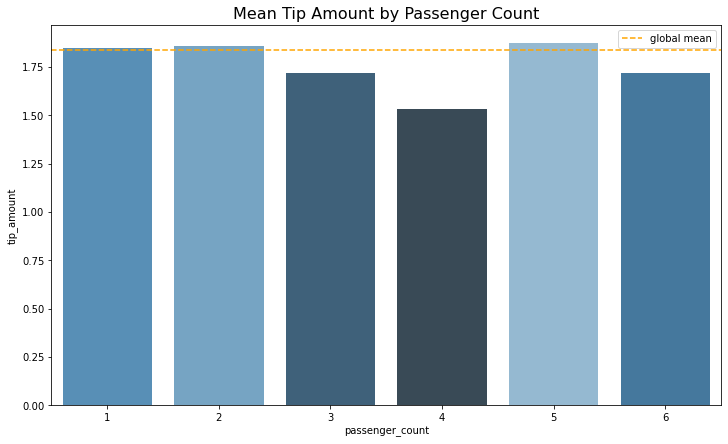

In [19]:
# Creating bar plot for mean tips by passenger count
data = mean_tips_by_passenger_count.tail(-1)
pal = sns.color_palette("Blues_d", len(data))
rank = data['tip_amount'].argsort().argsort()
plt.figure(figsize=(12,7))
ax = sns.barplot(x=data.index,
                y=data['tip_amount'],
                palette=np.array(pal[::-1])[rank])
ax.axhline(df['tip_amount'].mean(), ls='--', color='Orange', label='global mean')
ax.legend()
plt.title('Mean Tip Amount by Passenger Count', fontsize=16)


The average tip amount shows minimal variation based on the number of passengers. However, it exhibits a noticeable decrease for rides with four passengers, which is unsurprising given that there were fewer rides with four passengers in the dataset, making the data less stable for this category.

**Create month and day columns**

In [20]:
# Creating a month column
df['month'] = df['tpep_pickup_datetime'].dt.month_name()

# Creating a day column
df['day'] = df['tpep_pickup_datetime'].dt.day_name()

**Plot total ride count by month**

I'll begin by calculating total ride count by month.

In [21]:
# Getting total number of rides for each month
monthly_rides = df['month'].value_counts()
monthly_rides

March        2049
October      2027
April        2019
May          2013
January      1997
June         1964
December     1863
November     1843
February     1769
September    1734
August       1724
July         1697
Name: month, dtype: int64


Reorganizing the results to align the months in chronological order as per the calendar.

In [22]:
# Reordering the monthly ride list so months go in order
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
         'August', 'September', 'October', 'November', 'December']

monthly_rides = monthly_rides.reindex(index=month_order)
monthly_rides

January      1997
February     1769
March        2049
April        2019
May          2013
June         1964
July         1697
August       1724
September    1734
October      2027
November     1843
December     1863
Name: month, dtype: int64

In [23]:
# Showing the index
monthly_rides.index

Index(['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August', 'September', 'October', 'November', 'December'],
      dtype='object')

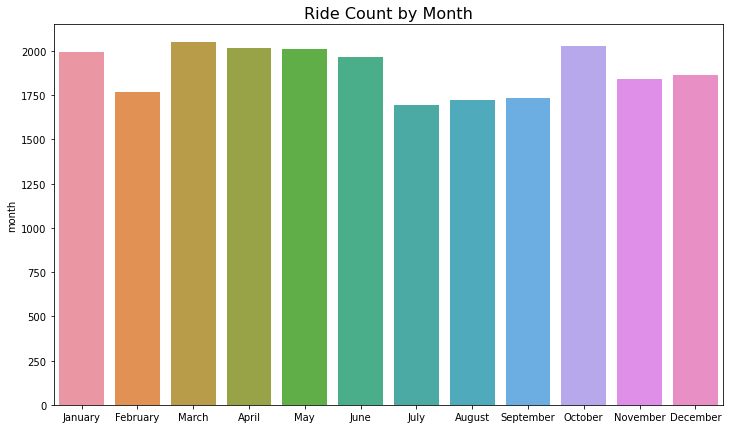

In [24]:
# Creating a bar plot of total rides per month
plt.figure(figsize=(12,7))
ax = sns.barplot(x=monthly_rides.index, y=monthly_rides)
ax.set_xticklabels(month_order)
plt.title('Ride Count by Month', fontsize=16);

The number of rides per month remains relatively stable, except for significant declines observed during the summer months (July, August, and September) as well as in February.

**Plot total ride count by day**


In [25]:
# Repeating the above process, this time for rides by day
daily_rides = df['day'].value_counts()
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_rides = daily_rides.reindex(index=day_order)
daily_rides

Monday       2931
Tuesday      3198
Wednesday    3390
Thursday     3402
Friday       3413
Saturday     3367
Sunday       2998
Name: day, dtype: int64

Text(0.5, 1.0, 'Rides Count by Day')

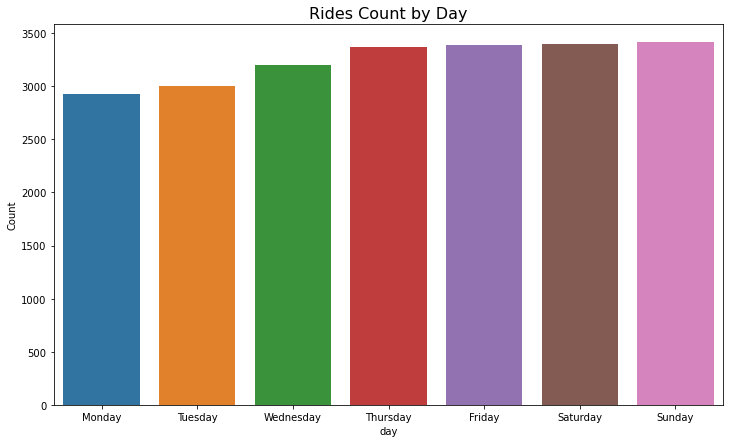

In [26]:
# Creating bar plot for ride count by day
plt.figure(figsize=(12,7))
ax =sns.barplot(x=daily_rides, y=daily_rides)
ax.set_xticklabels(day_order)
ax.set_ylabel('Count')
plt.title('Rides Count by Day', fontsize=16)

The days from Wednesday to Saturday recorded the highest daily ride counts, while Sunday and Monday had the lowest.

**Plot total revenue by day of the week**

Repeating the above process, but now calculating the total revenue by day of the week.

In [27]:
# Repeating the process, this time for total revenue by day
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
total_amount_day = df.groupby('day').sum()[['total_amount']]
total_amount_day = total_amount_day.reindex(index=day_order)
total_amount_day


,total_amount
day,
Monday,49574.37
Tuesday,52527.14
Wednesday,55310.47
Thursday,57181.91
Friday,55818.74
Saturday,51195.40
Sunday,48624.06


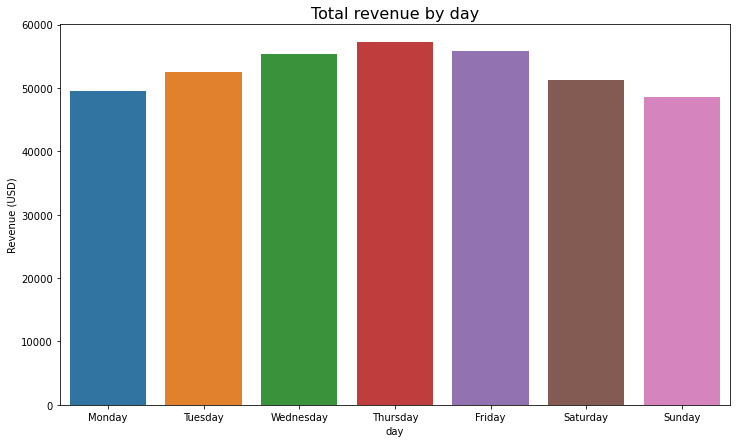

In [28]:
# Create bar plot of total revenue by day
plt.figure(figsize=(12,7))
ax = sns.barplot(x=total_amount_day.index, y=total_amount_day['total_amount'])
ax.set_xticklabels(day_order)
ax.set_ylabel('Revenue (USD)')
plt.title('Total revenue by day', fontsize=16);

Thursday generated the highest total revenue among all days, while Sunday and Monday had the lowest revenue. Interestingly, despite Saturday having only 35 fewer rides than Thursday, its revenue was approximately $6,000 less than Thursday's, representing a drop of over 10%

**Plot total revenue by month**

In [29]:
# Repeating the process, this time for total revenue by month
total_amount_month = df.groupby('month').sum()[['total_amount']]
total_amount_month = total_amount_month.reindex(index=month_order)
total_amount_month

,total_amount
month,
January,31735.25
February,28937.89
March,33085.89
April,32012.54
May,33828.58
June,32920.52
July,26617.64
August,27759.56
September,28206.38


Text(0.5, 1.0, 'Total Revenue by Month')

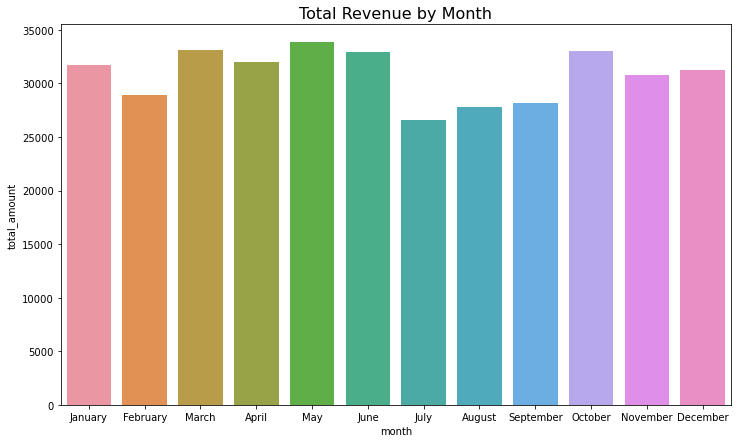

In [30]:
# Creatinhg a bar plot of total revenue by month
plt.figure(figsize=(12,7))
ax = sns.barplot(x=total_amount_month.index,y=total_amount_month['total_amount'])
plt.title('Total Revenue by Month', fontsize=16)

he monthly revenue typically mirrors the trend seen in monthly ride counts, with visible declines during the summer months of July, August, and September, as well as a dip in February.

**Plot mean trip distance by drop-off location**

In [31]:
# Getting number of unique drop-off location IDs
df['DOLocationID'].nunique()

216

In [32]:
# Calculating the mean trip distance for each drop-off location
distance_by_dropoff = df.groupby('DOLocationID').mean()[['trip_distance']]

# Sorting the results in descending order by mean trip distance
distance_by_dropoff = distance_by_dropoff.sort_values(by='trip_distance')
distance_by_dropoff


,trip_distance
DOLocationID,
207,1.200000
193,1.390556
237,1.555494
234,1.727806
137,1.818852
...,...
51,17.310000
11,17.945000
210,20.500000


Text(0.5, 1.0, 'Mean Trip Distance by Drop-off Location')

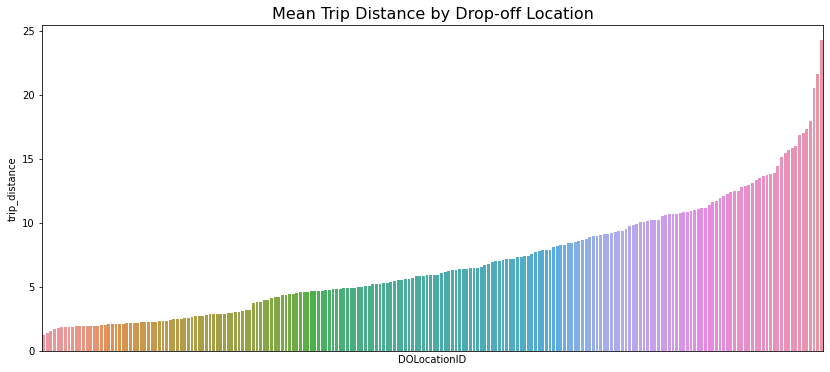

In [33]:
# Creating a bar plot of mean trip distances by drop-off location in ascending order by distance
plt.figure(figsize=(14,6))
ax = sns.barplot(x=distance_by_dropoff.index, y=distance_by_dropoff['trip_distance'],
                order=distance_by_dropoff.index)
ax.set_xticklabels([])
ax.set_xticks([])
plt.title('Mean Trip Distance by Drop-off Location', fontsize=16)

This plot depicts a curve that reflects the cumulative density function of a normal distribution, suggesting a relatively even distribution of drop-off points across the terrain. This observation is valuable as geographic coordinates were absent from the dataset, making it challenging to assess location distribution. 

**In confirming my conclusion, I'll consider the following experiment**
1. Creating a sample of coordinates from a normal distribution&mdash;in this case 1,500 pairs of points from a normal distribution with a mean of 10 and a standard deviation of 5
2. Calculating the distance between each pair of coordinates 
3. Grouping the coordinates by endpoint and calculate the mean distance between that endpoint and all other points it was paired with
4. Plotting the mean distance for each unique endpoint

Text(0.5, 1.0, 'Mean distance Between Points taken Randomly from Normal Distribution')

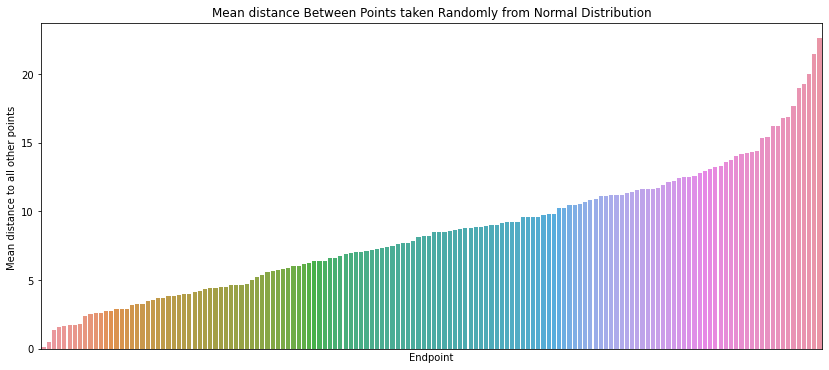

In [34]:
#BONUS CONTENT

#1. Generating random points on a 2D plane from a normal distribution
test = np.round(np.random.normal(10, 5, (300, 2)), 1)
midway = int(len(test)/2)

midway = int(len(test)/2)  # Calculate midpoint of the array of coordinates
start = test[:midway]      # Isolate first half of array ("pick-up locations")
end = test[midway:]        # Isolate second half of array ("drop-off locations")

# 2. Calculating Euclidean distances between points in first half and second half of array
distances = (start - end)**2
distances = distances.sum(axis=-1)
distances = np.sqrt(distances)

# 3. Grouping the coordinates by "drop-off location", compute mean distance
test_df = pd.DataFrame({'start': [tuple(x) for x in start.tolist()],
                       'end': [tuple(x) for x in end.tolist()],
                       'distance': distances})
data = test_df[['end', 'distance']].groupby('end').mean()
data = data.sort_values(by='distance')

# 4. Plotting the mean distance between each endpoint ("drop-off location") and all points it connected to
plt.figure(figsize=(14,6))
ax = sns.barplot(x=data.index,
                y=data['distance'],
                order=data.index)
ax.set_xticklabels([])
ax.set_xticks([])
ax.set_xlabel('Endpoint')
ax.set_ylabel('Mean distance to all other points ')
ax.set_title('Mean distance Between Points taken Randomly from Normal Distribution')

The shape of this graph closely resembles the one representing the average distance covered in each taxi ride to its respective drop-off location, indicating a uniform geographic distribution of drop-off points in the taxi dataset. It's important to clarify that this uniform distribution does not necessarily imply an even distribution of rides to each individual drop-off point.

**Histogram of rides by drop-off location**

In [35]:
# Checking if all drop-off locations are consecutively numbered
df['DOLocationID'].max() - len(set(df['DOLocationID']))

49

here are 49 numerical values that do not correspond to any specific drop-off location.

To eliminate the spaces in the historgram that these missing numbers would create, I'll sort the unique drop-off location values, then convert them to strings. This will make the histplot function display all bars directly next to each other. 

Text(0.5, 1.0, 'Histogram of rides by drop-off location')

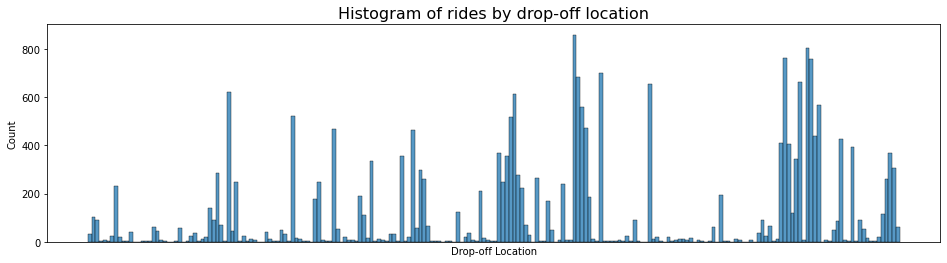

In [36]:
plt.figure(figsize=(16, 4))
# DOLocationID column is numeric, so sorting in ascending order
sorted_dropoffs = df['DOLocationID'].sort_values()

# Converting to string
sorted_dropoffs = sorted_dropoffs.astype('str')

# Plotting
sns.histplot(sorted_dropoffs, bins=range(0, df['DOLocationID'].max()+1, 1))
plt.xticks([])
plt.xlabel('Drop-off Location')
plt.title('Histogram of rides by drop-off location', fontsize=16)

Observing over 200 drop-off spots, it becomes evident that a significant imbalance exists, with only a handful of locations receiving most of the rides, while the remaining ones experience relatively low traffic. These highly frequented spots are likely to be situated near popular tourist destinations such as the Empire State Building or Times Square, as well as transportation hubs like airports, train stations, and bus terminals. Unfortunately, the dataset lacks information to link each ID with its corresponding location

## PACE: Execute 


In [37]:
df['trip_duration'] = (df['tpep_dropoff_datetime']-df['tpep_pickup_datetime'])

In [38]:
# displaying first few columns
df.head(10)

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,...,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,month,day,trip_duration
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,...,13.0,0.0,0.5,2.76,0.0,0.3,16.56,March,Saturday,0 days 00:14:04
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,...,16.0,0.0,0.5,4.00,0.0,0.3,20.80,April,Tuesday,0 days 00:26:30
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,...,6.5,0.0,0.5,1.45,0.0,0.3,8.75,December,Friday,0 days 00:07:12
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,...,20.5,0.0,0.5,6.39,0.0,0.3,27.69,May,Sunday,0 days 00:30:15
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,...,16.5,0.5,0.5,0.00,0.0,0.3,17.80,April,Saturday,0 days 00:16:43
5,23345809,2,2017-03-25 20:34:11,2017-03-25 20:42:11,6,2.30,1,N,161,236,...,9.0,0.5,0.5,2.06,0.0,0.3,12.36,March,Saturday,0 days 00:08:00
6,37660487,2,2017-05-03 19:04:09,2017-05-03 20:03:47,1,12.83,1,N,79,241,...,47.5,1.0,0.5,9.86,0.0,0.3,59.16,May,Wednesday,0 days 00:59:38
7,69059411,2,2017-08-15 17:41:06,2017-08-15 18:03:05,1,2.98,1,N,237,114,...,16.0,1.0,0.5,1.78,0.0,0.3,19.58,August,Tuesday,0 days 00:21:59
8,8433159,2,2017-02-04 16:17:07,2017-02-04 16:29:14,1,1.20,1,N,234,249,...,9.0,0.0,0.5,0.00,0.0,0.3,9.80,February,Saturday,0 days 00:12:07
9,95294817,1,2017-11-10 15:20:29,2017-11-10 15:40:55,1,1.60,1,N,239,237,...,13.0,0.0,0.5,2.75,0.0,0.3,16.55,November,Friday,0 days 00:20:26


### Summary of Resuts

The analysis involved exploring taxi ride data, revealing insights into trip distances, expenses, tip amounts, vendor performance, and ride patterns.
Most trips were short, with distances under two miles, leading to a sharp decline in trip count for longer distances.
Expenses and tip amounts exhibited right-skewed distributions, with most falling within specific ranges.
Vendor performance was consistent, with slightly more rides for one vendor, especially in the higher tip amount range.
Mean tips by passenger count showed minimal variation, except for a decrease with four passengers.
Ride patterns varied by day and month, with Thursdays generating the highest total revenue and the summer months experiencing declines.
Drop-off locations appeared to have a relatively even geographic distribution.
Further experimentation confirmed this distribution, indicating that drop-off points were distributed uniformly.
An imbalance was observed in ride distribution across over 200 drop-off locations, with a few receiving most rides.


###  Conclusion
The analysis provided valuable insights into the taxi ride dataset. It revealed patterns related to trip distances, expenses, tip amounts, vendor performance, passenger counts, and ride patterns by month and day. Notably, it showed that drop-off locations were relatively evenly distributed geographically.

### Recommendations:

Vendor Performance: Continue monitoring and maintaining the consistent performance of both vendors in terms of tip amounts and ride distribution.

Passenger Count: Consider strategies to encourage more rides with four passengers to stabilize tip amounts for this category.

Revenue Enhancement: Explore ways to boost revenue on lower-performing days like Sunday and Monday, possibly through targeted promotions or incentives.


### Next Steps:

Further Investigation: Investigate the impact of excluding the "last_evaluation" variable on predictive models, as this could help identify potential data leakage and improve model performance.

Predictive Models: Develop predictive models for employee retention that do not rely on "last_evaluation" or explore predicting performance scores or satisfaction scores.

Geographic Analysis: Conduct further analysis of drop-off locations to understand the specific locations associated with high-traffic areas and explore potential partnerships or promotions with these locations.

Data Enhancement: Consider collecting geographic coordinates in future datasets to enable more precise geographic analysis.

Continuous Monitoring: Continuously monitor and analyze ride data to identify evolving trends and opportunities for improvement.